# Sarcasm detection from news headlines
#### In this project, I work on a dataset that contains news headlines - which are aimed to be written in a sarcastic manner by the news author. The main objective is to build a NLP models and predict whether the headline is sarcastic or not (classification).

#### The dataset consists about 44262 text data points where each data category belongs to 2 category - Sarcastic or Not Sarcastic.

#### I will start with an easy bag of words model combining with logistic regression to make predictions. I then use a deep learning models for making predictions - GloVe Embeddings. We will then compare their results and see which performs better. 

## Load and view the dataset 

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Train_Data.csv')
df.head(5)

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


In [4]:
# check if there is empty headline
df.isna().sum()

headline        0
is_sarcastic    0
dtype: int64

In [5]:
# chech wether the dataset is balanced
df['is_sarcastic'].value_counts()

0    23958
1    20304
Name: is_sarcastic, dtype: int64

#### The dataset is balanced. 

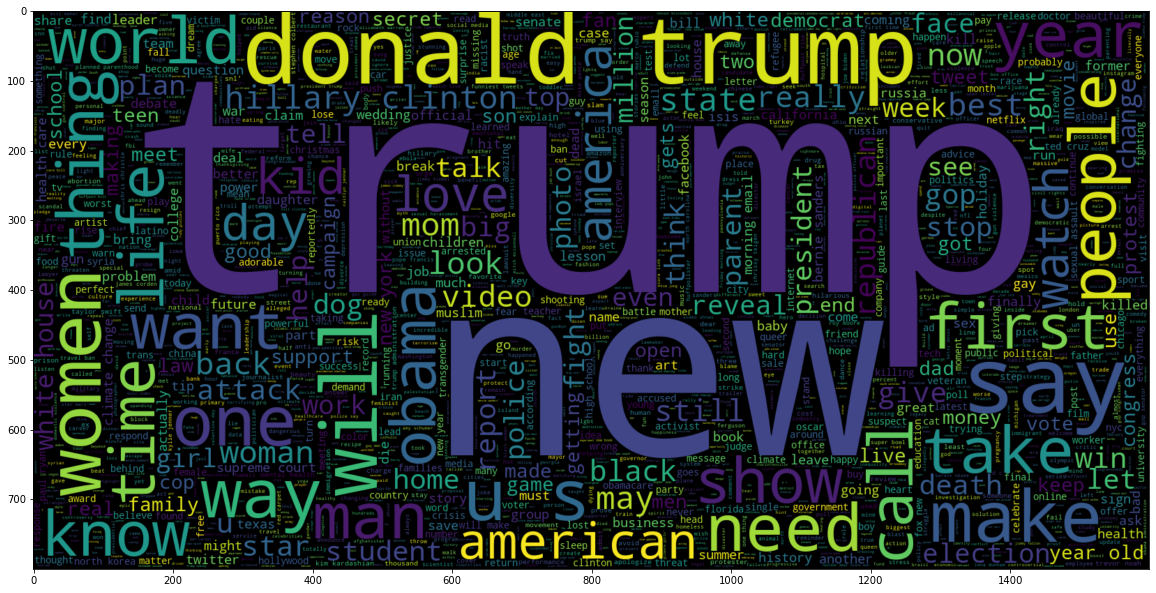

In [6]:
# Load word cloud package
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# view word cloud for not sarcastic news headline
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')


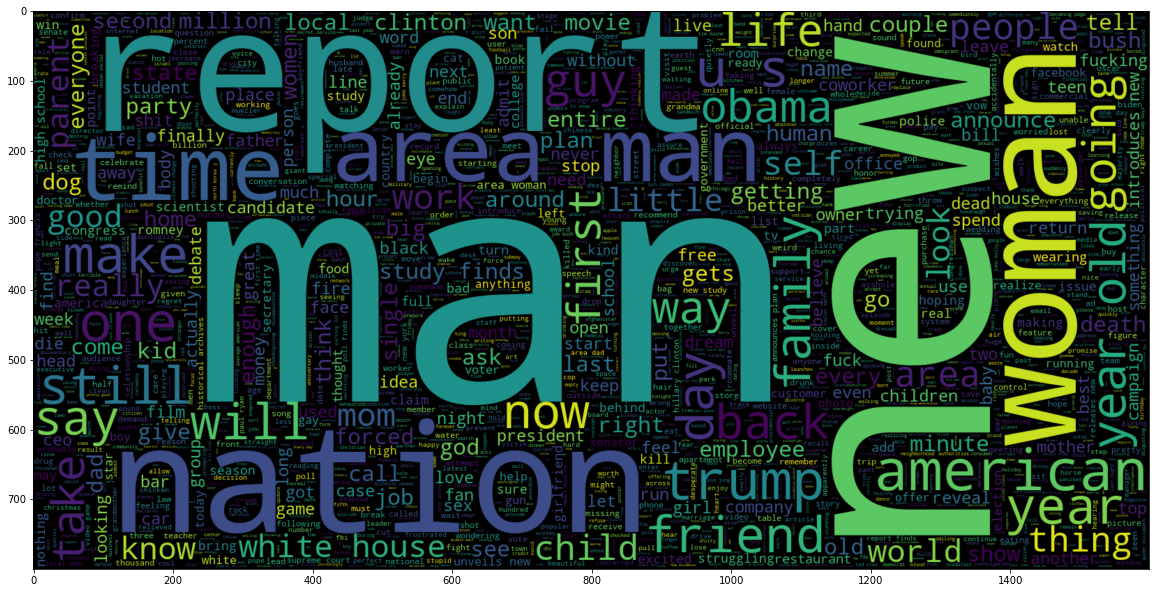

In [7]:
# view word cloud for sarcastic news headline
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

#### Check number of words in each headline

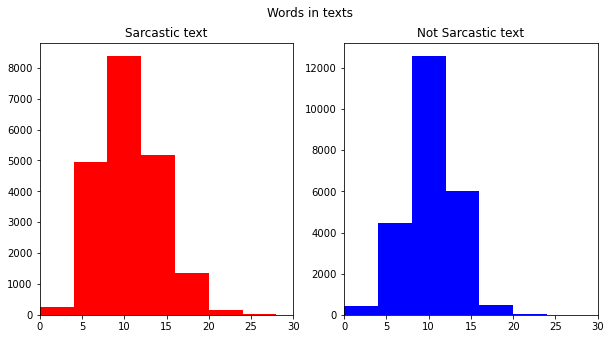

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red',range=(0,40))
ax1.set_title('Sarcastic text')
ax1.set_xlim(0,30)
text_len=df[df['is_sarcastic']==0]['headline'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='blue',range=(0,40))
ax2.set_title('Not Sarcastic text')
ax2.set_xlim(0,30)
fig.suptitle('Words in texts')
plt.show()

## Build train and test dataset

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['headline']], df['is_sarcastic'], random_state=42)
X_train.shape, X_test.shape

((33196, 1), (11066, 1))

## Text Pre-processing 
#### I plan to extract some specific features based on standard NLP feature engineering models like the TF-IDF model. For this I have to clean and pre-process the text data. I will then build a simple text pre-processor with the following steps:

* Expanding contraction
* Lowercasing the text
* Removing unnecessary characters, numbers and symbols
* Stemming
* Stopword removal

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import contractions
import re

[nltk_data] Downloading package punkt to /Users/Chi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Chi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# set up some stopwords to 
stop_words = nltk.corpus.stopwords.words('english')

In [12]:
# building a text normalizer
def normalize_text(text):
  # expand contractions
  text = contractions.fix(text)

  # lowercase
  text = str(text).lower()

  # remove unnecessary characters
  text = re.sub(r'[^a-zA-Z]',r' ', text)
  text = re.sub(r'nbsp', r'', text)
  text = re.sub(' +', ' ', text)

  # stemming
  ps = nltk.porter.PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])

  # stopword removal
  text = ' '.join([word for word in text.split() if word not in stop_words])

  return text

nt = np.vectorize(normalize_text)


In [13]:
X_train['clean_headline'] = nt(X_train['headline'].values)
X_test['clean_headline'] = nt(X_test['headline'].values)
X_train.head()

,headline,clean_headline
34059,authoritarian secretary of transportation decl...,authoritarian secretari transport declar ha ul...
6098,study: marriages between perfectly matched cou...,studi marriag perfectli match coupl still onli...
6252,employee wellness programs aren't so voluntary...,employe well program voluntari anymor
20826,p is for p*ssy' is the alphabet book of your w...,p p ssi alphabet book wet dream
24719,nothing going right for area surgeon today,noth go right area surgeon today


# Experiment 1: Vectorizing text with BOG model and training logistic regression model

## Adding Bag of Words (BOG) based features with bi-grams

Here, I use the bag of words model to vectorize each headline.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1, 2))
X_traincv = cv.fit_transform(X_train['clean_headline']).toarray()
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

X_testcv = cv.transform(X_test['clean_headline']).toarray()
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())

X_traincv.head(5)

,aaa,aaa member,aaron,aaron carter,aaron eckhart,aaron hernandez,aaron rodger,aaron sorkin,aarp,aarp repres,...,zuckerberg real,zuckerberg recal,zuckerberg regret,zuckerberg sell,zuckerberg senat,zuckerberg trump,zuckerberg watch,zuckerberg wish,zz,zz top
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train Logistic regression model

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, random_state=42, solver='liblinear').fit(X_traincv, y_train)
Y_pred=logreg.predict(X_testcv)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluation
print(classification_report(y_test,Y_pred))
pd.DataFrame(confusion_matrix(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5947
           1       0.94      0.89      0.92      5119

    accuracy                           0.92     11066
   macro avg       0.93      0.92      0.92     11066
weighted avg       0.93      0.92      0.92     11066



,0,1
0,5672,275
1,564,4555


In [31]:
# load test data
test_df = pd.read_csv('Test_Data.csv')
test_df['clean_headline'] = nt(test_df['headline'].values)

# vectorize test text
testcv = cv.transform(test_df['clean_headline']).toarray()
testcv = pd.DataFrame(testcv, columns=cv.get_feature_names())

testcv.head(5)

,aaa,aaa member,aaron,aaron carter,aaron eckhart,aaron hernandez,aaron rodger,aaron sorkin,aarp,aarp repres,...,zuckerberg real,zuckerberg recal,zuckerberg regret,zuckerberg sell,zuckerberg senat,zuckerberg trump,zuckerberg watch,zuckerberg wish,zz,zz top
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# save predictions as csv file
Y_pred = logreg.predict(testcv)
Y_pred = pd.DataFrame(Y_pred,columns=['prediction'])
Y_pred.head()
Y_pred.to_csv('submission_lr.csv')

# Experiment 2: modelling with Word2Vec
#### "word2vec is not a singular algorithm, rather, it is a family of model architectures and optimizations that can be used to learn word embeddings from large datasets. Embeddings learned through word2vec have proven to be successful on a variety of downstream natural language processing tasks.."

Converting text to format acceptable by gensim

In [41]:
words = []
for i in df.headline.values:
    words.append(i.split())
words[:5]

[['supreme',
  'court',
  'votes',
  '7-2',
  'to',
  'legalize',
  'all',
  'worldly',
  'vices'],
 ['hungover',
  'man',
  'horrified',
  'to',
  'learn',
  'he',
  'made',
  'dozens',
  'of',
  'plans',
  'last',
  'night'],
 ["emily's",
  'list',
  'founder:',
  'women',
  'are',
  'the',
  "'problem",
  "solvers'",
  'in',
  'congress'],
 ['send', 'your', 'kids', 'back', 'to', 'school', 'with', 'confidence'],
 ['watch:', 'experts', 'talk', 'pesticides', 'and', 'health']]

In [43]:
import gensim
#Dimension of vectors we are generating
EMBEDDING_DIM = 200

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences = words , vector_size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [47]:
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = 20)

In [48]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [53]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [62]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

## Train Word2Vec model

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [64]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 200)           7399600   
                                                                 
 bidirectional_8 (Bidirectio  (None, 20, 256)          336896    
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               55680     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,792,241
Trainable params: 7,792,241
Non-trainable params: 0
_________________________________________________________________


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, df.is_sarcastic , test_size = 0.3 , random_state = 0) 

In [66]:
history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)

Epoch 1/3
243/243 [==============================] - 78s 282ms/step - loss: 0.3247 - acc: 0.8564 - val_loss: 0.1917 - val_acc: 0.9239
Epoch 2/3
243/243 [==============================] - 75s 309ms/step - loss: 0.0613 - acc: 0.9791 - val_loss: 0.2445 - val_acc: 0.9160
Epoch 3/3
243/243 [==============================] - 80s 331ms/step - loss: 0.0149 - acc: 0.9947 - val_loss: 0.2750 - val_acc: 0.9315


In [67]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

969/969 [==============================] - 14s 15ms/step - loss: 0.0042 - acc: 0.9991
Accuracy of the model on Training Data is -  99.9064028263092
415/415 [==============================] - 6s 15ms/step - loss: 0.2750 - acc: 0.9315
Accuracy of the model on Testing Data is -  93.14707517623901


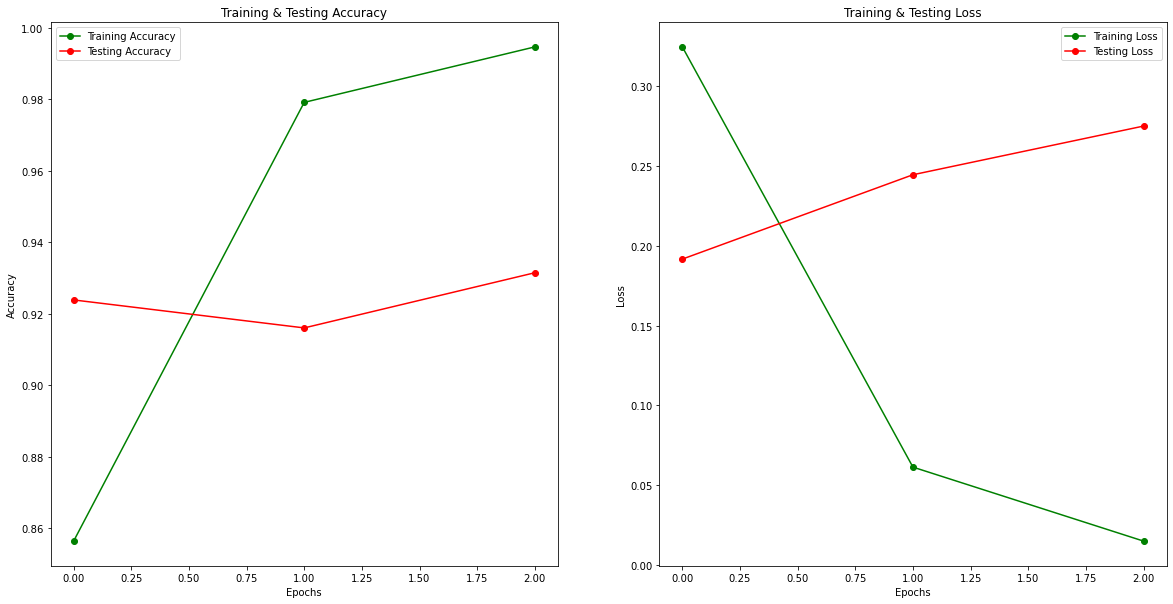

In [82]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [77]:
# evaluation
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype("int32")
print(classification_report(y_test,y_pred))
pd.DataFrame(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7270
           1       0.92      0.93      0.92      6009

    accuracy                           0.93     13279
   macro avg       0.93      0.93      0.93     13279
weighted avg       0.93      0.93      0.93     13279



,0,1
0,6790,480
1,430,5579


In [78]:
# load test data
test_df = pd.read_csv('Test_Data.csv')
words_test = []
for i in test_df.headline.values:
    words_test.append(i.split())
    
tokenized_test = tokenizer.texts_to_sequences(words_test)
x_t = sequence.pad_sequences(tokenized_test, maxlen = 20)

In [80]:
# predict
prediction = (model.predict(x_t)>0.5).astype("int32")
prediction

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [81]:
# save result
Y_pred2 = pd.DataFrame(prediction,columns=['prediction'])
Y_pred2.head()
Y_pred2.to_csv('submission_w2v.csv')